In [21]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics import tsaplots

In [22]:
# Import train data
ne_train = pd.read_csv("/Users/Huey.ts/Desktop/STAT_390/data/ne_train.csv")
s_train = pd.read_csv("/Users/Huey.ts/Desktop/STAT_390/data/s_train.csv")

# Import test data
ne_test = pd.read_csv("/Users/Huey.ts/Desktop/STAT_390/data/ne_test.csv")
s_test = pd.read_csv("/Users/Huey.ts/Desktop/STAT_390/data/s_test.csv")

In [23]:
ne_train_transformed = pd.merge(ne_train.date, ne_train["covid_19_confirmed_cases"], 
                                left_index=True, right_index=True)
ne_test_transformed = pd.merge(ne_test.date, ne_test["covid_19_confirmed_cases"], 
                                left_index=True, right_index=True)
ne_train_transformed.set_index("date", inplace = True)
ne_test_transformed.set_index("date", inplace = True)

In [24]:
ne_test_transformed.index = pd.to_datetime(ne_test_transformed.index)

In [25]:
s_train_transformed = pd.merge(s_train.date, s_train["covid_19_confirmed_cases"], 
                                left_index=True, right_index=True)
s_test_transformed = pd.merge(s_test.date, s_test["covid_19_confirmed_cases"], 
                                left_index=True, right_index=True)
s_train_transformed.set_index("date", inplace = True)
s_test_transformed.set_index("date", inplace = True)

In [26]:
s_test_transformed.index = pd.to_datetime(ne_test_transformed.index)

# Auto-ARIMA Models

## NE Model
- Residual stats show that residual looks like white noise with normal distribution and mean close to 0
- ACF and PACF plots of residuals show barely any significant spikes for larger lags
    - Residuals are close to white noise
- Visualization of train data fitted values shows over-fitting
- MAE is reasonably good (399 confirmed cases)
    - Improvement from ARIMA

In [8]:
ne_auto_arima = auto_arima(ne_train_transformed, stepwise = False, seasonal = False)

In [9]:
ne_auto_arima

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

In [10]:
auto_arima = ARIMA(ne_train_transformed, order=(2,1,2))
auto_arima = auto_arima.fit()

/Users/Huey.ts/miniconda3/envs/tf/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/Huey.ts/miniconda3/envs/tf/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/Huey.ts/miniconda3/envs/tf/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


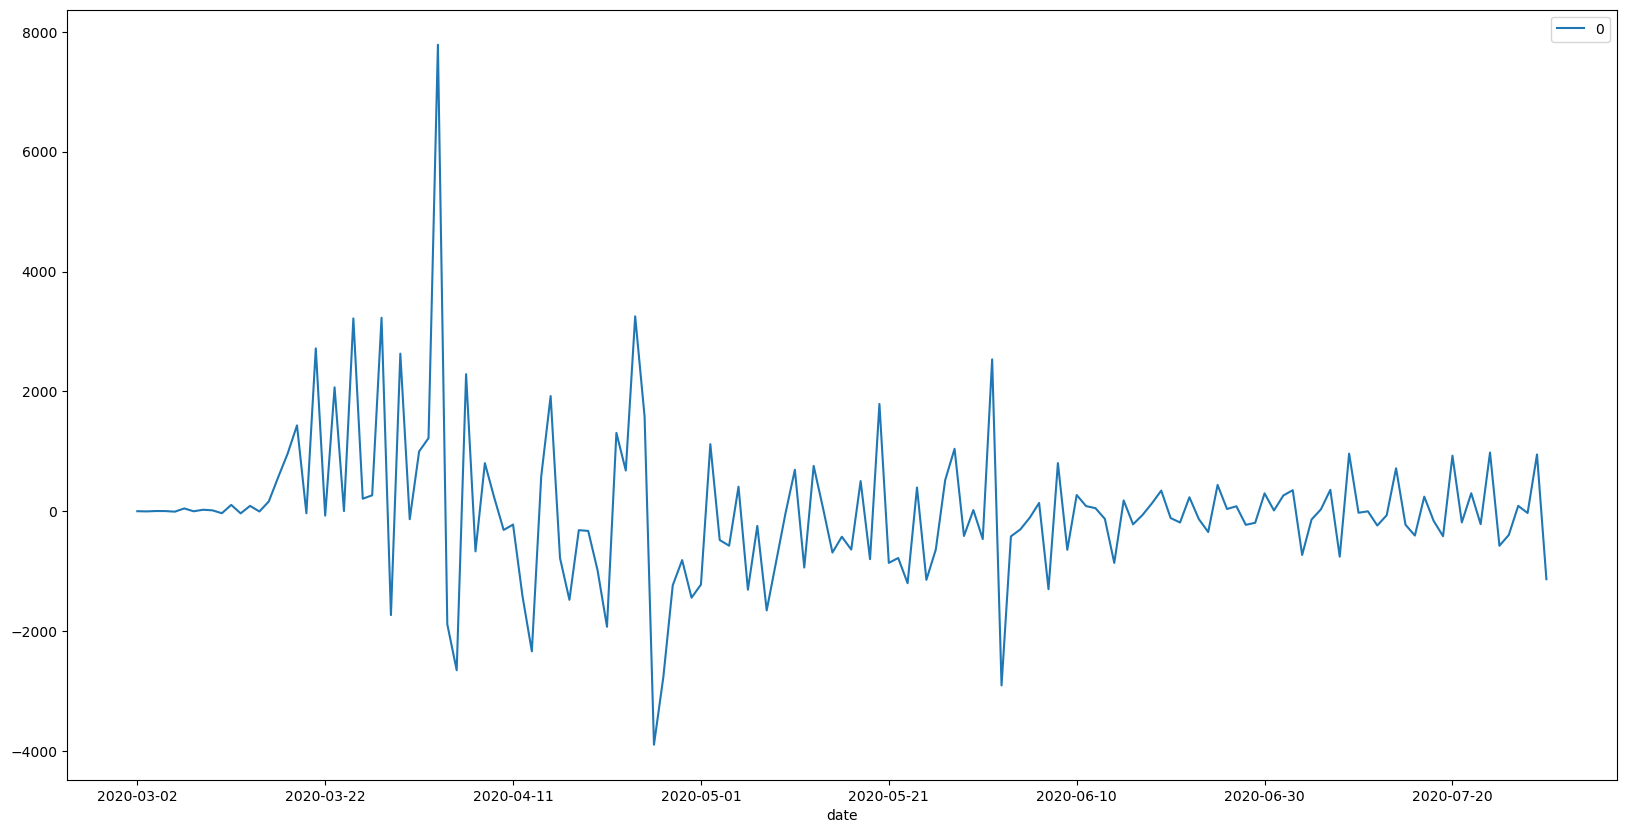

In [11]:
# line plot of residuals
residuals = pd.DataFrame(auto_arima.resid)
residuals.plot(figsize = (20,10))
plt.show()

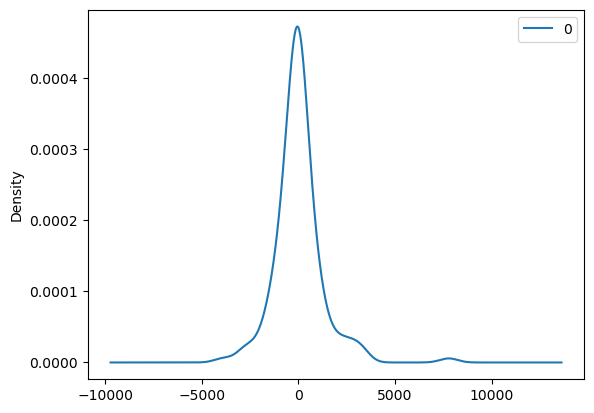

In [12]:
# density plot of residuals
residuals.plot(kind='kde')
plt.show()

In [13]:
# summary stats of residuals
print(residuals.describe())

                 0
count   151.000000
mean     20.914661
std    1257.566628
min   -3891.581688
25%    -469.555856
50%     -22.604552
75%     350.231734
max    7783.712372


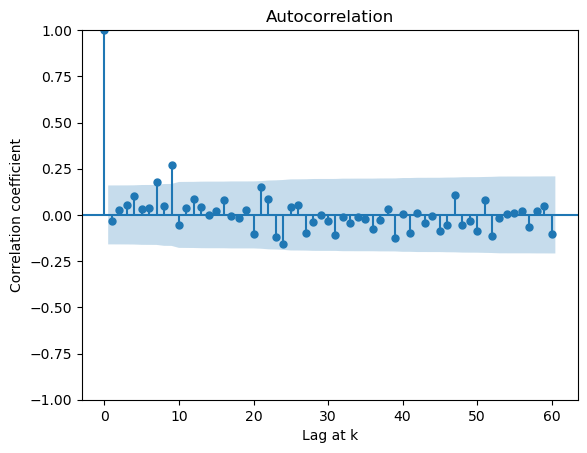

In [14]:
# ACF plot of residuals
fig = tsaplots.plot_acf(residuals, lags=60)

plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.show()

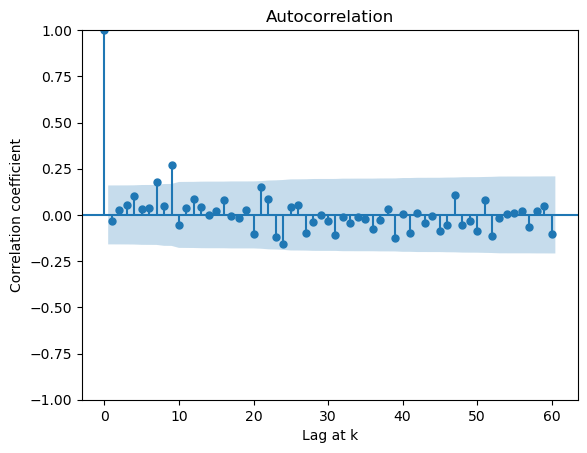

In [15]:
# PACF plot of residuals
fig = tsaplots.plot_acf(residuals, lags=60)

plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.show()

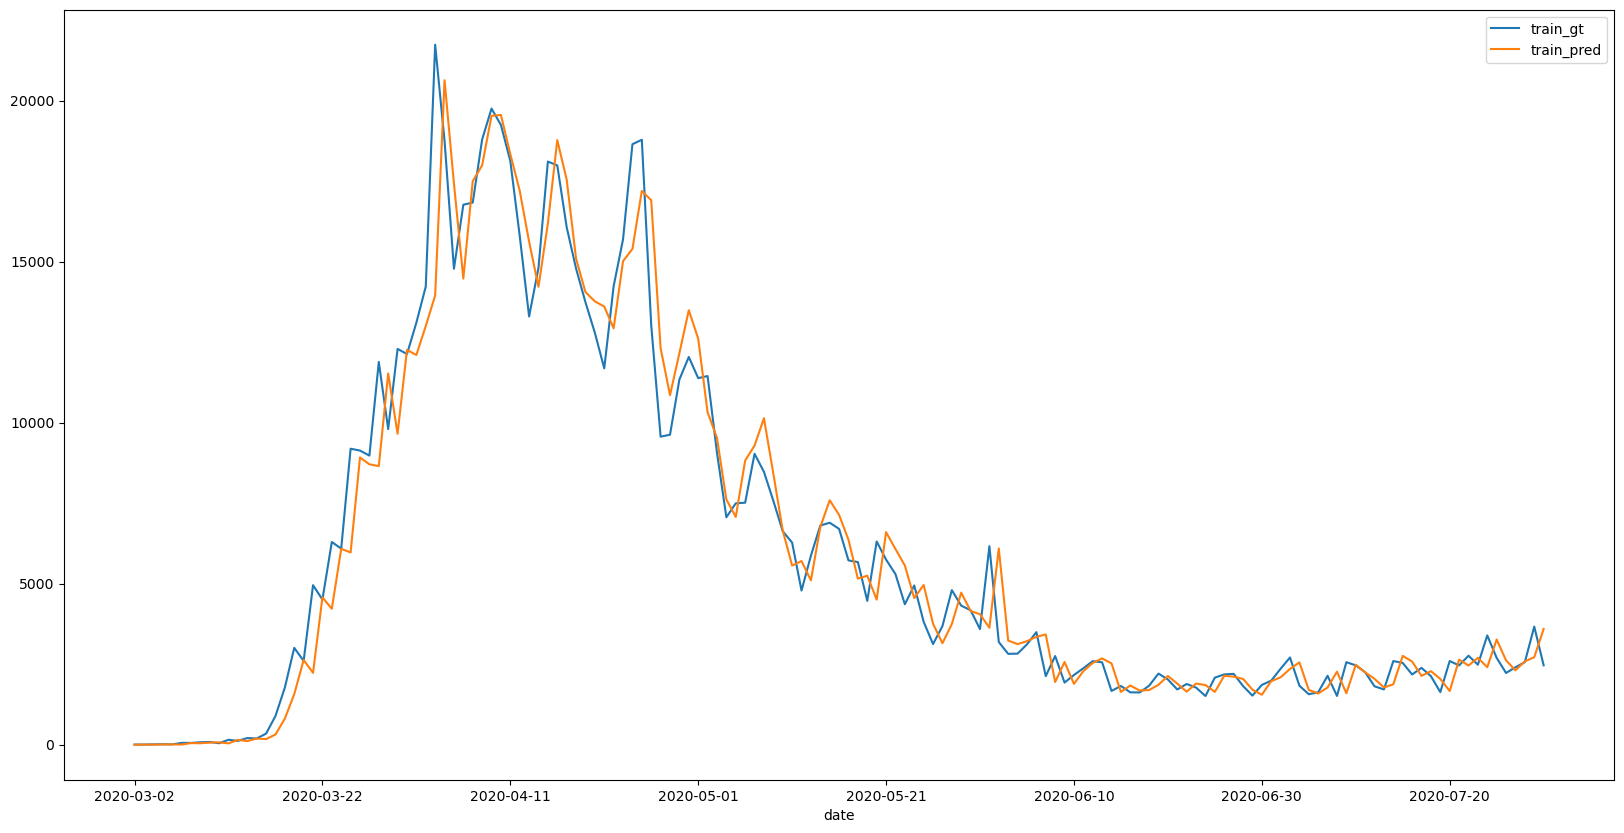

In [16]:
# Visualizing train data fitted values
ne_train_pred = ne_auto_arima.fittedvalues()
pd.concat([ne_train_transformed, ne_train_pred], axis=1).plot(figsize=(20, 10))
plt.legend(['train_gt', 'train_pred'])

In [17]:
ne_test_pred = ne_auto_arima.predict(n_periods=len(ne_test_transformed))

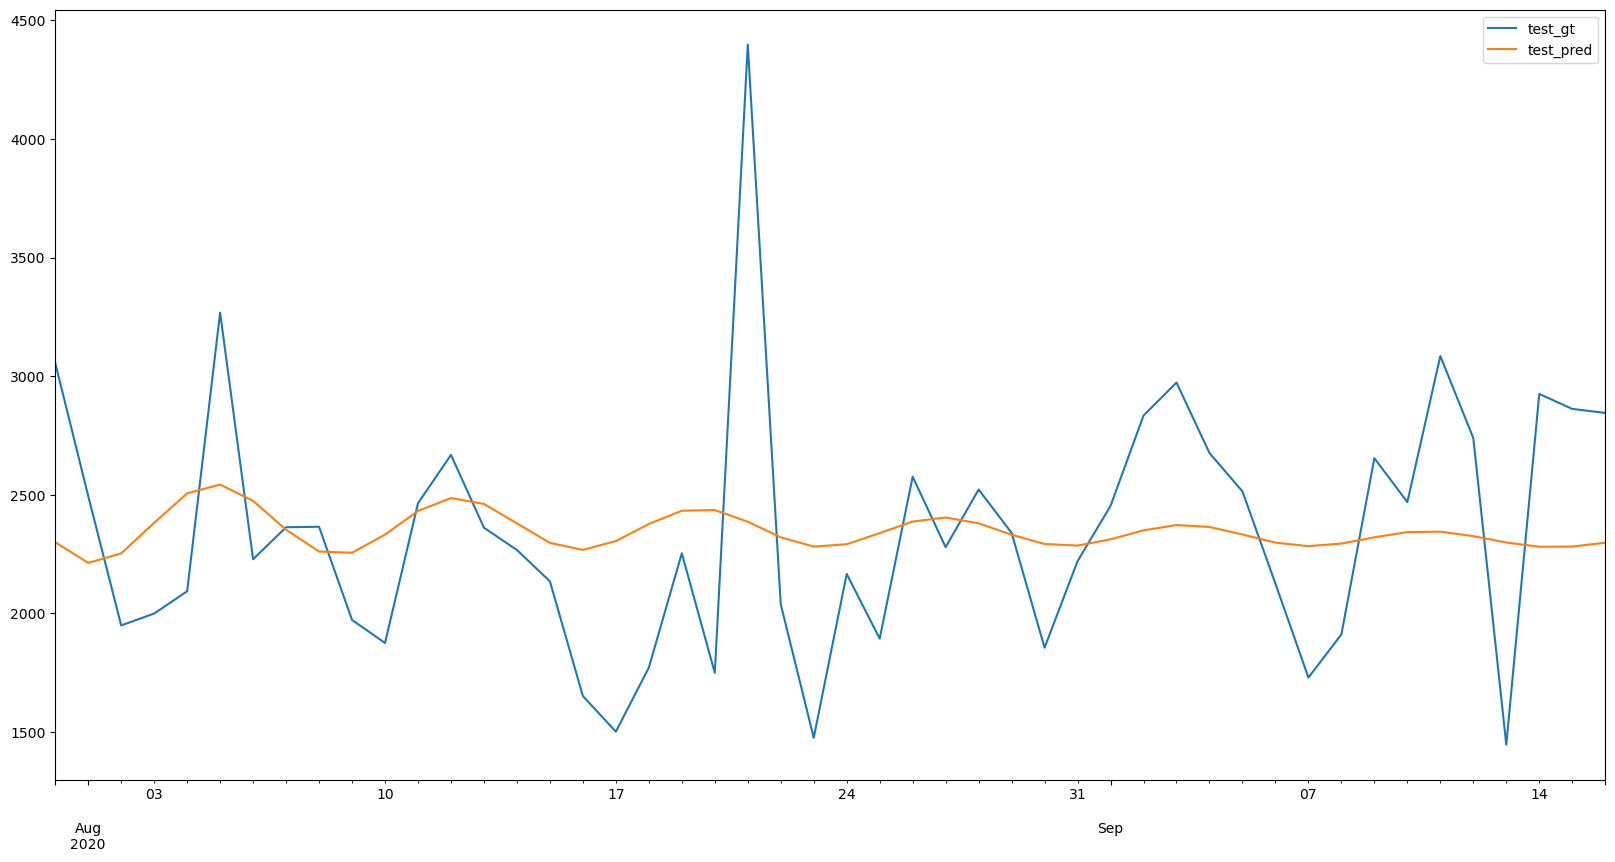

In [18]:
# Visualizing test data fitted values
pd.concat([ne_test_transformed, ne_test_pred], axis=1).plot(figsize=(20, 10))
plt.legend(['test_gt', 'test_pred'])

In [19]:
# MAE
mean_absolute_error(ne_test_transformed, ne_test_pred)

399.0094701381213

## S Model
- Model doesn't use seasonality
- Residual stats show that residual looks like white noise with normal distribution but mean not close to 0
    - Some bias in prediction
    - More bias in prediction than ARIMA
- ACF and PACF plots of residuals show barely any significant spikes for larger lags
    - Residuals are close to white noise
- Visualization of train data fitted values shows over-fitting
- MAE is quite large (16505 confirmed cases)
    - Worse than ARIMA

In [27]:
s_auto_arima = auto_arima(s_train_transformed, stepwise = False, seasonality = True)

In [28]:
s_auto_arima

ARIMA(order=(5, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [107]:
auto_arima = ARIMA(s_train_transformed, order=(5,1,0))
auto_arima = auto_arima.fit()

/Users/Huey.ts/miniconda3/envs/tf/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/Huey.ts/miniconda3/envs/tf/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/Huey.ts/miniconda3/envs/tf/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


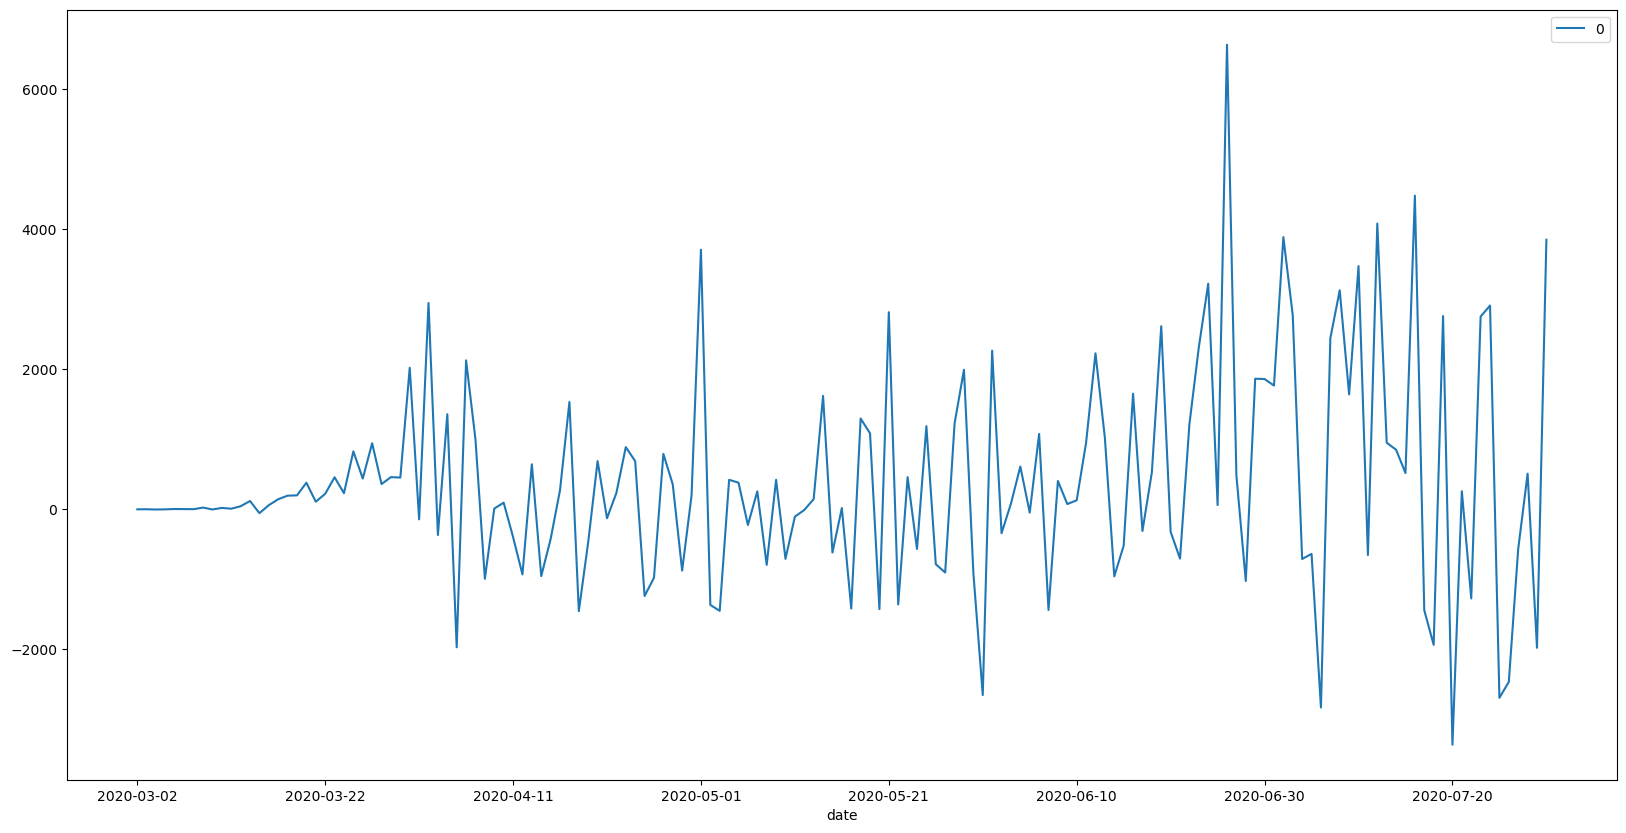

In [108]:
# line plot of residuals
residuals = pd.DataFrame(auto_arima.resid)
residuals.plot(figsize = (20,10))
plt.show()

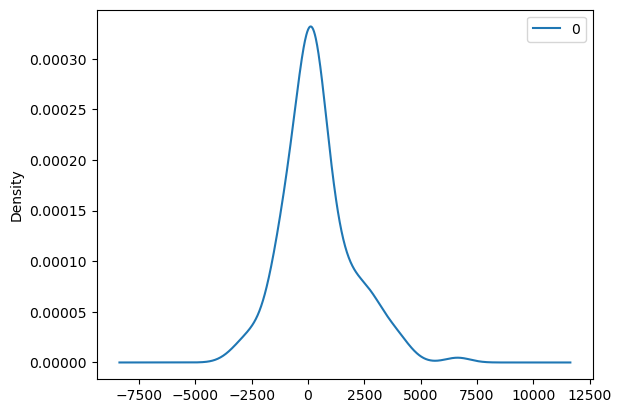

In [109]:
# density plot of residuals
residuals.plot(kind='kde')
plt.show()

In [110]:
# summary stats of residuals
print(residuals.describe())

                 0
count   151.000000
mean    398.859676
std    1527.139311
min   -3360.636789
25%    -492.777810
50%     146.802217
75%    1009.783633
max    6636.103465


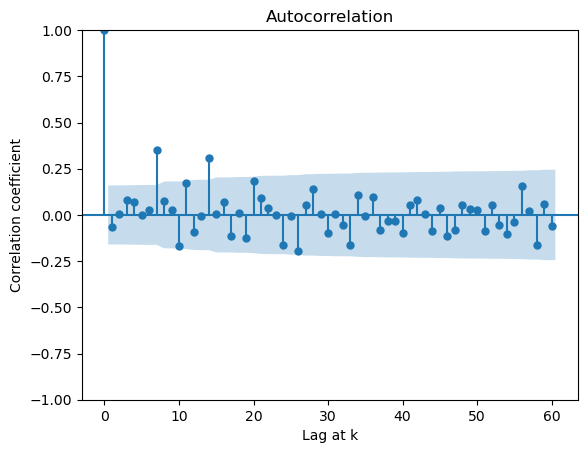

In [111]:
# ACF plot of residuals
fig = tsaplots.plot_acf(residuals, lags=60)

plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.show()

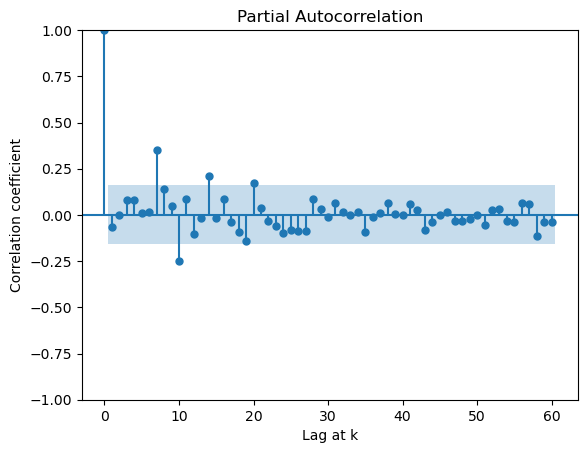

In [112]:
# ACF plot of residuals
fig = tsaplots.plot_pacf(residuals, lags=60)

plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.show()

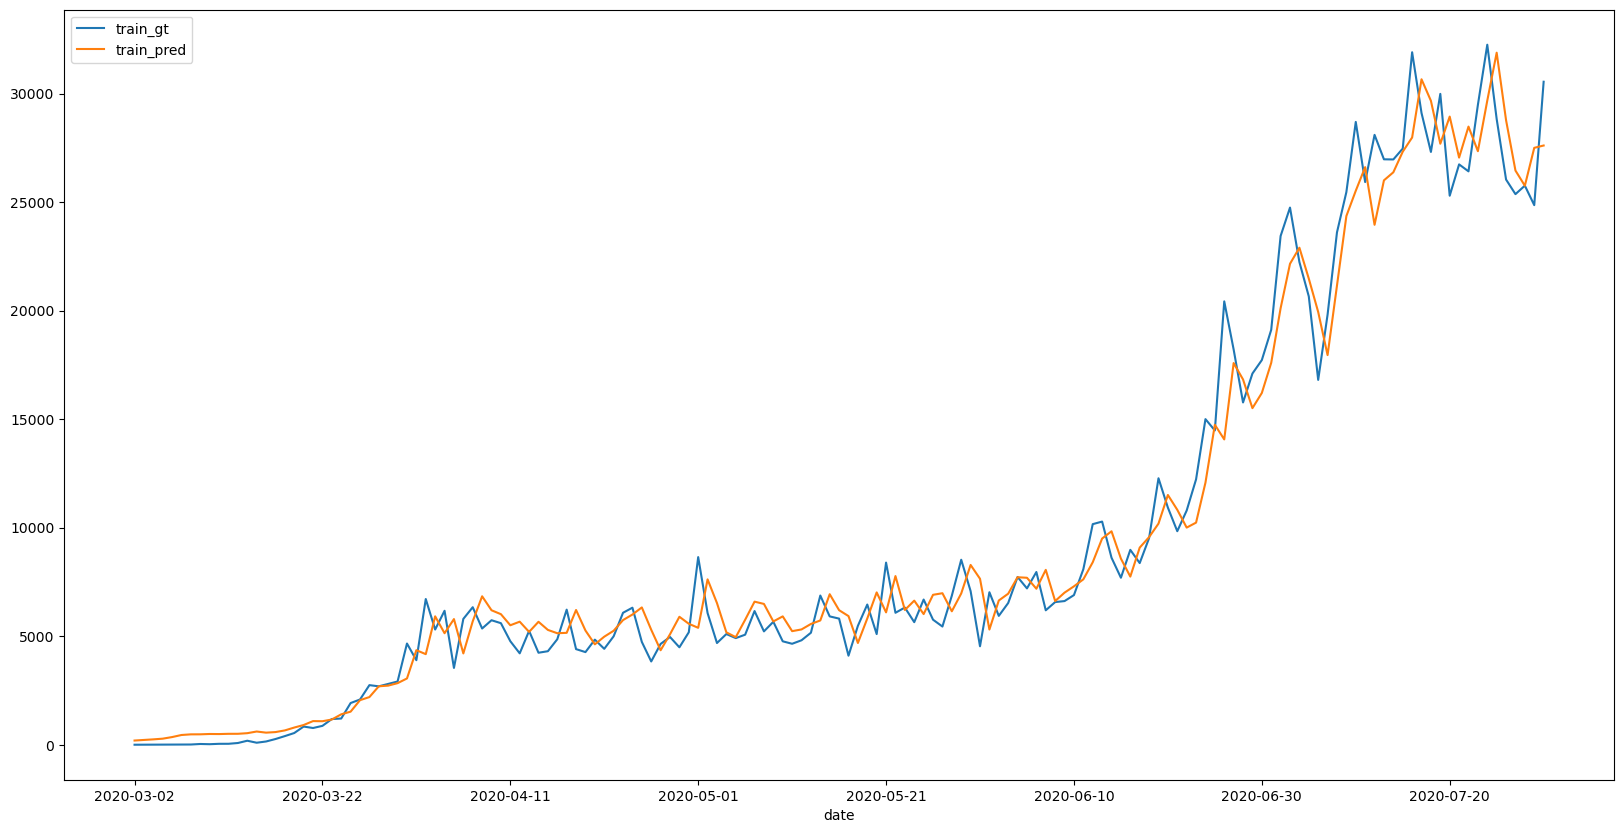

In [113]:
# Visualizing train data fitted values
s_train_pred = s_auto_arima.fittedvalues()
pd.concat([s_train_transformed, s_train_pred], axis=1).plot(figsize=(20, 10))
plt.legend(['train_gt', 'train_pred'])

In [114]:
s_test_pred = s_auto_arima.predict(n_periods=len(s_test_transformed))

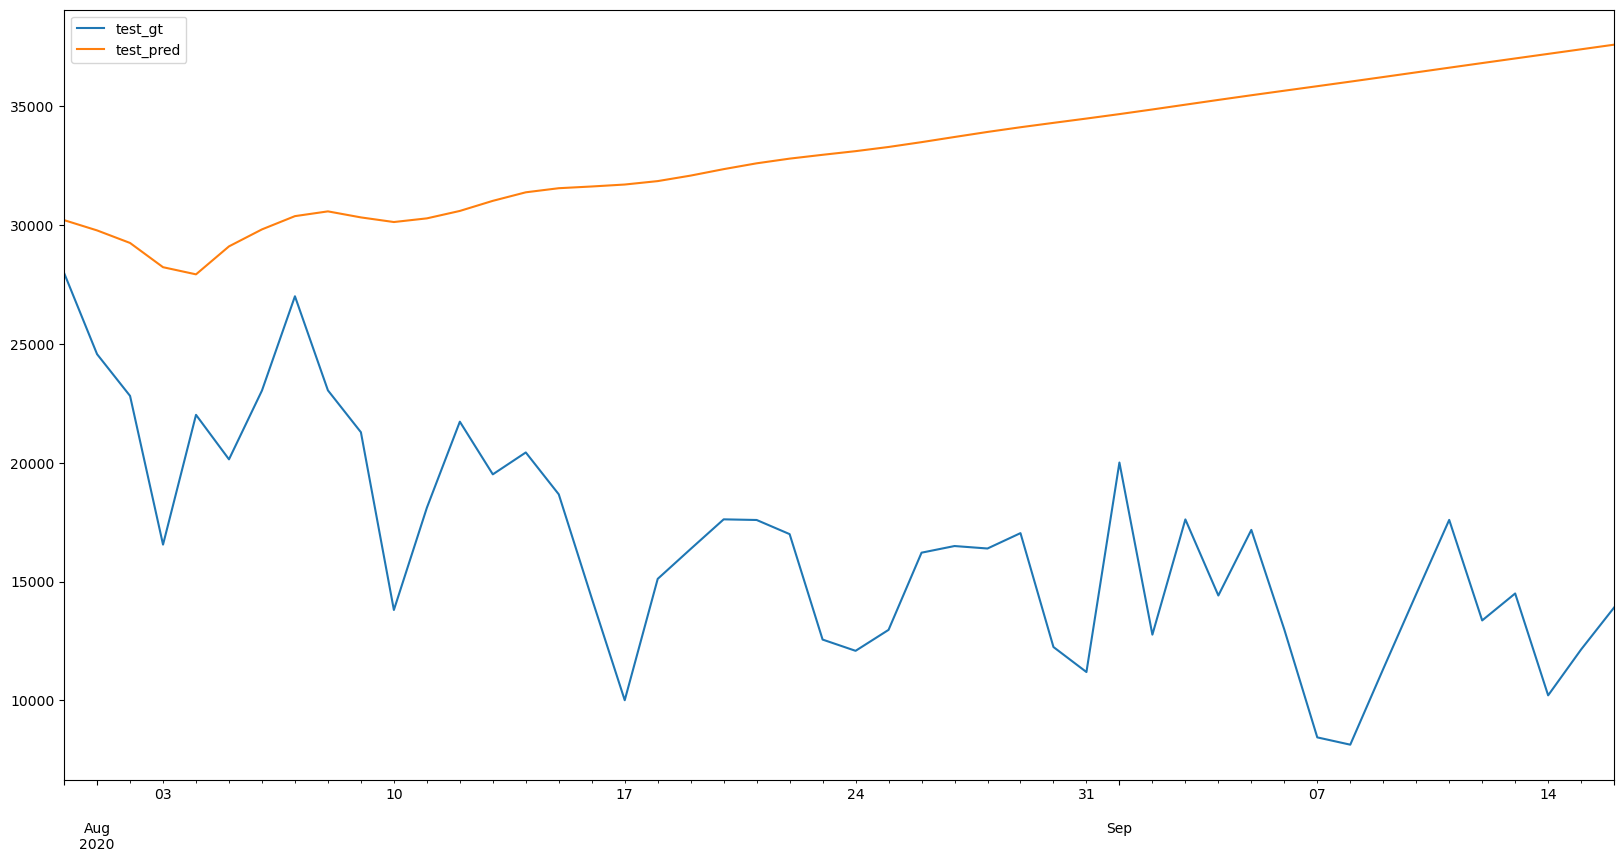

In [115]:
# Visualizing test data fitted values
pd.concat([s_test_transformed, s_test_pred], axis=1).plot(figsize=(20, 10))
plt.legend(['test_gt', 'test_pred'])

In [116]:
# MAE
mean_absolute_error(s_test_transformed, s_test_pred)

16505.6508847283